# Capstone Project - The Battle of Neighborhoods (Week 2)

### Description of the problem and a discussion of the background

New York, the Big Apple, is a famous city for travelling, working, and exploring. It is the most ethnically diverse, religiously varied, commercially driven, famously congested, and, in the eyes of many, the most attractive urban centre in the country. There's no other city has contributed more images to the collective consciousness of Americans: Wall Street means finance, Broadway is synonymous with theatre, Fifth Avenue is automatically paired with shopping, Madison Avenue means the advertising industry, Greenwich Village connotes bohemian lifestyles, Seventh Avenue signifies fashion, Tammany Hall defines machine politics, and Harlem evokes images of the Jazz Age, African American aspirations, and slums. 

Based on The Research Unit at NYC & Company, in 2018 there were 65.1 million travelers visiting New York City, both domestic and international visitors reached new highs.  This is also the ninth straight annual increase since the economic slowdown in 2009: over the 2010-2018 periods, travel volume gains averaged 4.2% per year, rising from 48.8 million to 65.1 million. Most of those folks came from other parts of the United States, but in terms of visitors outside the U.S., the biggest numbers of tourists from Great Britain (1.24 million) and China (1.1 million).

Some friends of mine, who are running tea related business together, are curious about the handmade tea in New York since some handmade tea brand, such as Sharetea, Kung Fu Tea, Coco…etc are famous and popular in Asian countries. They are thinking about either setup a handmade tea room or luxury tea room with modern decoration. They’d like to know some questions below:

* How many Tea Rooms in New York City?
* Which areas have the most Tea Room?
* How’s their rating?
* Which will be the potential area if they want to open Tea Room?
* Which will be the potential area if they want to open luxury tea room with modern decoration?

## Description of the data

For this project I use the following data :
* New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.
  Data source : https://cocl.us/new_york_dataset
* Tea Rooms in each neighborhood of New York city.
  Data source : Fousquare API
* GeoSpace data
  Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

## Approach

* Collect the new york city data from https://cocl.us/new_york_dataset
* Using FourSquare API we will find all venues for each neighborhood.
* Filter out all venues that are Tea Rooms.
* Find rating, tips and like count for each Tea Rooms using FourSquare API.
* Visualize the Ranking of neighborhoods using folium library

## Analysis

Import required libraries for python
* pandas and numpy for handling data.
* request module for using FourSquare API.
* geopy to get co-ordinates of City of New York.
* folium to visualize the results on a map

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import os

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. Start by creating an empty dataframe.

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then loop through the data and fill the dataframe one row at a time.

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [12]:
neighborhoods.to_csv('NYC_NYC_GEO.csv',index=False)

Use geopy library to get the latitude and longitude values of New York City.

In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with neighborhoods superimposed on top.

In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [15]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'M1QIXMNBCJVWHN5L3MQ1BWAPQLTSQMRIID502DAHY2YEZMFB' # your Foursquare ID
    CLIENT_SECRET = 'W3CEDOOGDGY1EKI5OHXFMJZHUZKHJU2S001AB35CY4ZNOAST' # your Foursquare Secret
    VERSION = '20190801'
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [16]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'M1QIXMNBCJVWHN5L3MQ1BWAPQLTSQMRIID502DAHY2YEZMFB' # your Foursquare ID
    CLIENT_SECRET = 'W3CEDOOGDGY1EKI5OHXFMJZHUZKHJU2S001AB35CY4ZNOAST' # your Foursquare Secret
    VERSION = '20190801'
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

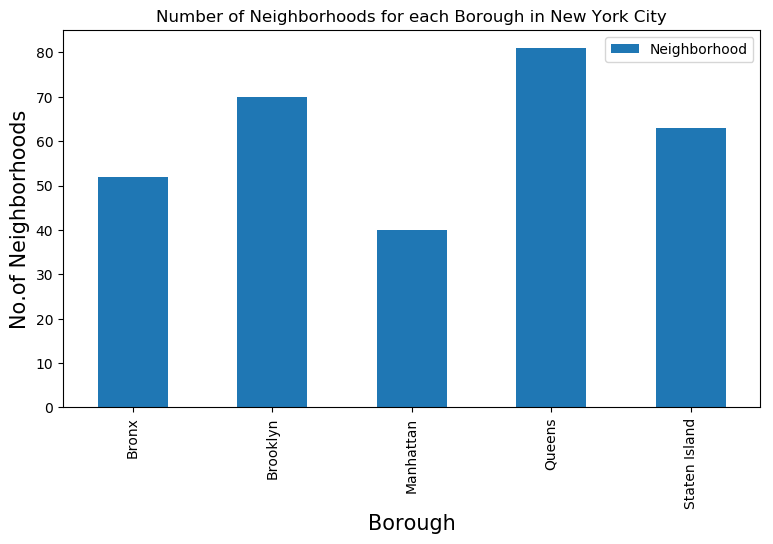

In [17]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhoods for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhoods', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [18]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
tea_room_ny=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    tea_room=venues[venues['Category']=='Tea Room']   
    print('(',count,'/',len(neighborhoods),')','Tea Room in '+Neighborhood+', '+Borough+':'+str(len(tea_room)))
    for resturant_detail in tea_room.values.tolist():
        id, name , category=resturant_detail
        tea_room_ny = tea_room_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Tea Room in Wakefield, Bronx:0
( 2 / 306 ) Tea Room in Co-op City, Bronx:0
( 3 / 306 ) Tea Room in Eastchester, Bronx:0
( 4 / 306 ) Tea Room in Fieldston, Bronx:0
( 5 / 306 ) Tea Room in Riverdale, Bronx:0
( 6 / 306 ) Tea Room in Kingsbridge, Bronx:0
( 7 / 306 ) Tea Room in Marble Hill, Manhattan:0
( 8 / 306 ) Tea Room in Woodlawn, Bronx:0
( 9 / 306 ) Tea Room in Norwood, Bronx:0
( 10 / 306 ) Tea Room in Williamsbridge, Bronx:0
( 11 / 306 ) Tea Room in Baychester, Bronx:0
( 12 / 306 ) Tea Room in Pelham Parkway, Bronx:0
( 13 / 306 ) Tea Room in City Island, Bronx:0
( 14 / 306 ) Tea Room in Bedford Park, Bronx:0
( 15 / 306 ) Tea Room in University Heights, Bronx:0
( 16 / 306 ) Tea Room in Morris Heights, Bronx:0
( 17 / 306 ) Tea Room in Fordham, Bronx:0
( 18 / 306 ) Tea Room in East Tremont, Bronx:0
( 19 / 306 ) Tea Room in West Farms, Bronx:0
( 20 / 306 ) Tea Room in High  Bridge, Bronx:0
( 21 / 306 ) Tea Room in Melrose, Bronx:0
( 22 / 306 ) Tea Room in Mott Haven, Bronx:0

We have got all the Tea Room in new york city , we will analyze it

In [19]:
tea_room_ny.head()

,Borough,Neighborhood,ID,Name
0,Brooklyn,Bay Ridge,4bff04f8480eef3b4d6a9e7f,HoM Bay Ridge
1,Brooklyn,Bensonhurst,5aadc39de2d4aa1546ed82c1,Prince Tea House
2,Brooklyn,Sunset Park,4c04292739d476b0dc1e31a7,Ten Ren's Tea Time 天仁
3,Brooklyn,Sunset Park,4a9ff2d3f964a520ae3d20e3,T Baar (茶霸 Tbaar inc.)
4,Brooklyn,Sunset Park,4cb0d820eb65b1f70ae16fcd,Kung Fu Tea


In [20]:
tea_room_ny.shape

(24, 4)

We got 24 Tea Room across New York City

Get the number of Tea Rooms in each Borough

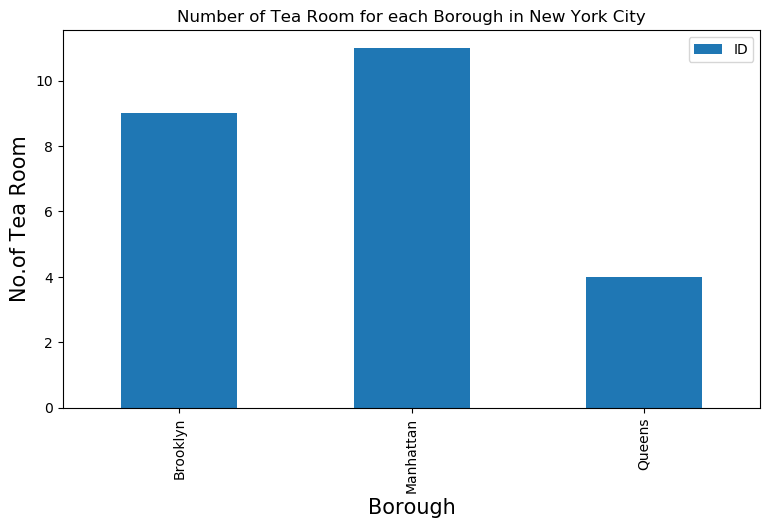

In [21]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Tea Room for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Tea Room', fontsize=15)
#giving a bar plot
tea_room_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that Tea Rooms are most located in Manhattan 

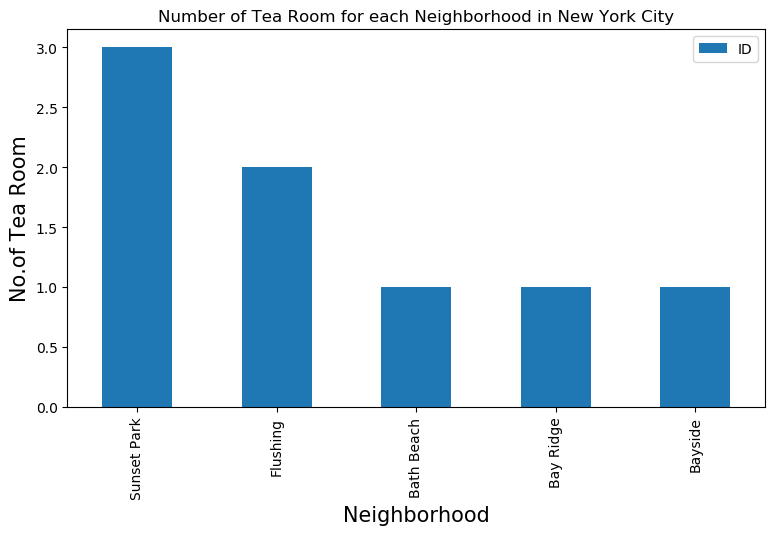

In [22]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Tea Room for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Tea Room', fontsize=15)
#giving a bar plot
tea_room_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We get the ranking of each Tea Room for further analysis.

In [23]:
# prepare neighborhood list that contains tea room
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
tea_room_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in tea_room_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(tea_room_ny),')','processed')
    tea_room_stats_ny = tea_room_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID           Name  Likes  Rating  Tips
0  4bff04f8480eef3b4d6a9e7f  HoM Bay Ridge     24     8.5    12
( 1 / 24 ) processed
                         ID              Name  Likes  Rating  Tips
0  5aadc39de2d4aa1546ed82c1  Prince Tea House      7     6.8     5
( 2 / 24 ) processed
                         ID                   Name  Likes  Rating  Tips
0  4c04292739d476b0dc1e31a7  Ten Ren's Tea Time 天仁     31     7.7     9
( 3 / 24 ) processed
                         ID                    Name  Likes  Rating  Tips
0  4a9ff2d3f964a520ae3d20e3  T Baar (茶霸 Tbaar inc.)     11     7.1     6
( 4 / 24 ) processed
                         ID         Name  Likes  Rating  Tips
0  4cb0d820eb65b1f70ae16fcd  Kung Fu Tea     28     6.6    22
( 5 / 24 ) processed
                         ID     Name  Likes  Rating  Tips
0  4e8f8cb0d3e3187fc28dc932  Bellocq     90     9.1    20
( 6 / 24 ) processed
                         ID              Name  Likes  Rating  Tips
0  5aadc39de2d4

In [24]:
tea_room_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Bay Ridge,4bff04f8480eef3b4d6a9e7f,HoM Bay Ridge,24,8.5,12
1,Brooklyn,Bensonhurst,5aadc39de2d4aa1546ed82c1,Prince Tea House,7,6.8,5
2,Brooklyn,Sunset Park,4c04292739d476b0dc1e31a7,Ten Ren's Tea Time 天仁,31,7.7,9
3,Brooklyn,Sunset Park,4a9ff2d3f964a520ae3d20e3,T Baar (茶霸 Tbaar inc.),11,7.1,6
4,Brooklyn,Sunset Park,4cb0d820eb65b1f70ae16fcd,Kung Fu Tea,28,6.6,22


In [25]:
tea_room_stats_ny.shape

(24, 7)

In [26]:
tea_room_ny.shape

(24, 4)

In [27]:
tea_room_stats_ny.to_csv('tea_room_stats_ny.csv', index=False)

In [28]:
tea_room_stats_ny_csv=pd.read_csv('tea_room_stats_ny.csv')

In [29]:
tea_room_stats_ny_csv.shape

(24, 7)

In [30]:
tea_room_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Bay Ridge,4bff04f8480eef3b4d6a9e7f,HoM Bay Ridge,24,8.5,12
1,Brooklyn,Bensonhurst,5aadc39de2d4aa1546ed82c1,Prince Tea House,7,6.8,5
2,Brooklyn,Sunset Park,4c04292739d476b0dc1e31a7,Ten Ren's Tea Time 天仁,31,7.7,9
3,Brooklyn,Sunset Park,4a9ff2d3f964a520ae3d20e3,T Baar (茶霸 Tbaar inc.),11,7.1,6
4,Brooklyn,Sunset Park,4cb0d820eb65b1f70ae16fcd,Kung Fu Tea,28,6.6,22


In [31]:
tea_room_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
Borough         24 non-null object
Neighborhood    24 non-null object
ID              24 non-null object
Name            24 non-null object
Likes           24 non-null object
Rating          24 non-null float64
Tips            24 non-null object
dtypes: float64(1), object(6)
memory usage: 1.4+ KB


In [32]:
tea_room_stats_ny['Likes']=tea_room_stats_ny['Likes'].astype('float64')

In [33]:
tea_room_stats_ny['Tips']=tea_room_stats_ny['Tips'].astype('float64')

In [34]:
tea_room_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
Borough         24 non-null object
Neighborhood    24 non-null object
ID              24 non-null object
Name            24 non-null object
Likes           24 non-null float64
Rating          24 non-null float64
Tips            24 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.4+ KB


In [35]:
# Tea room with maximum Likes
tea_room_stats_ny.iloc[tea_room_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                Little Italy
ID              4cd1ae08bcab95217f073a15
Name                       Harney & Sons
Likes                                569
Rating                               8.9
Tips                                 153
Name: 15, dtype: object

In [36]:
# Tea room with maximum Rating
tea_room_stats_ny.iloc[tea_room_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                West Village
ID              56292858498e5a271a288948
Name                     té (Té Company)
Likes                                184
Rating                               9.3
Tips                                  41
Name: 17, dtype: object

In [37]:
# tea with maximum Tips
tea_room_stats_ny.iloc[tea_room_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                East Village
ID              44acdefcf964a52014351fe3
Name                  Cha-An Teahouse 茶菴
Likes                                517
Rating                                 9
Tips                                 197
Name: 13, dtype: object

In [38]:
ny_neighborhood_stats=tea_room_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [39]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
20,West Village,9.3
9,Greenpoint,9.1
5,East Village,9.0
16,Soho,8.9
12,Little Italy,8.9
19,Tudor City,8.8
15,Murray Hill,8.8
18,Sutton Place,8.6
13,Lower East Side,8.6
10,Lenox Hill,8.6


Above are the top neighborhoods with top average rating of Tea Room

In [40]:
ny_borough_stats=tea_room_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [41]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.627273
2,Queens,7.975000
0,Brooklyn,7.722222


Similarly these are the average rating of Tea Room for each Borough

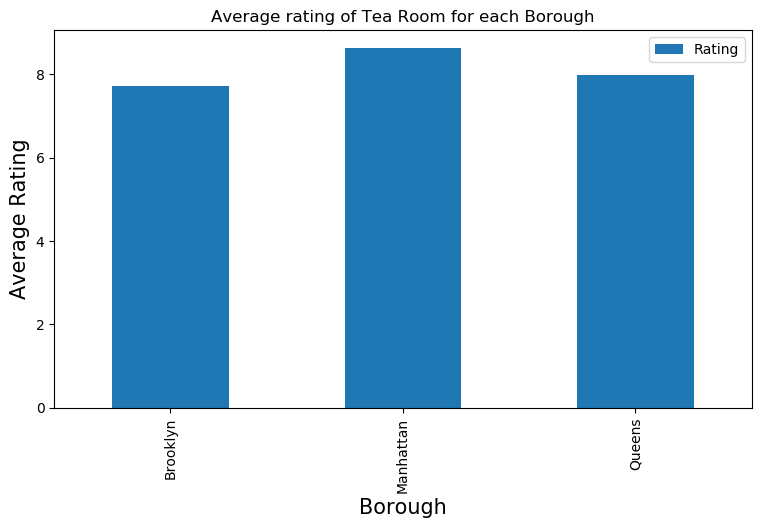

In [68]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Tea Room for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
tea_room_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


We will consider all the neighborhoods with average rating greater or equal 7.0 to visualize on map

In [44]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.0]

In [45]:
ny_neighborhood_stats

,Neighborhood,Average Rating
1,Bay Ridge,8.500000
2,Bayside,8.200000
4,Boerum Hill,8.400000
5,East Village,9.000000
6,Elmhurst,7.400000
7,Flushing,8.150000
8,Fort Hamilton,8.500000
9,Greenpoint,9.100000
10,Lenox Hill,8.600000
11,Lincoln Square,8.300000


We will join this dataset to original New York data to get lonitude and latitude

In [51]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,neighborhoods, on='Neighborhood')

In [52]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [53]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bay Ridge,40.625801,-74.030621,8.500000
1,Queens,Bayside,40.766041,-73.774274,8.200000
2,Brooklyn,Boerum Hill,40.685683,-73.983748,8.400000
3,Manhattan,East Village,40.727847,-73.982226,9.000000
4,Queens,Elmhurst,40.744049,-73.881656,7.400000
5,Queens,Flushing,40.764454,-73.831773,8.150000
6,Brooklyn,Fort Hamilton,40.614768,-74.031979,8.500000
7,Brooklyn,Greenpoint,40.730201,-73.954241,9.100000
8,Manhattan,Lenox Hill,40.768113,-73.958860,8.600000
9,Manhattan,Lincoln Square,40.773529,-73.985338,8.300000


Now we can show this data on a map

In [58]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  

In [59]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [60]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [62]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(map_newyork)        
# add incidents to map
map_newyork.add_child(incidents)

## Conclusion

* There are 24 Tea Rooms in New York City; 11 in Manhattan, 9 in Brooklyn and 4 in Queen. 
* The density of Tea Rooms is quite low compared with the amount of visitors in New York.
* The average ratings of those Tea Rooms in the 3 Boroughs are not much different between 7.7 ~ 8.6.
* The potential areas for opening the Tea Rooms or luxury Tea Rooms would be Manhattan and Brooklyn since the amount of Tea Rooms is quite low.


## Brainstorm / Limitation

* This data didn’t compare rental, cost of setup tea rooms or agency fee of brand.
* People’s taste preferences are different due to culture, habit, ages, or even fashion. These data are unavailable so these variables can’t be compared.
* Those data of Tea Rooms only contain shops having physical address. However, mobile food vendors also one of the methods to provide handmade tea products. 
* The accuracy of data depends purely depends on the data provided by FourSquare. 
